In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy
import os

In [2]:
caminhoDados = "../doc/Dados/CAGED"
dados2020 = os.listdir(caminhoDados + "/2020")
dados2021 = os.listdir(caminhoDados + "/2021")

In [3]:
def lerTabelasDiretorio(ano):
    caminhoDados = "../doc/Dados/CAGED"
    
    nomesTabelas = os.listdir(caminhoDados + "/" + ano)

    tabelas = {}

    for nome in nomesTabelas:
        nomeMes = nome.split(".")[0]  # Tira o ".xlxs" do nome
        
        tabelas[nomeMes] = pandas.read_excel(caminhoDados + "/" + ano + "/" + nome, sheet_name="Tabela 2")
    
    return tabelas

In [10]:
tabelas = {}
tabelas["2020"] = lerTabelasDiretorio("2020")
tabelas["2021"] = lerTabelasDiretorio("2021")

In [11]:
meses = ["janeiro", "fevereiro", "março", "abril", "maio", "junho", "julho", "agosto",
         "setembro", "outubro", "novembro", "dezembro"]

dadosFiltrados = []

for mes in meses:
    nomeParaExibir = mes[0].upper() + mes[1:]
    dicionarioMes = {}
    dicionarioMes["mes"] = nomeParaExibir
    dicionarioMes["admissoes"] = tabelas["2020"][mes]["Unnamed: 2"][6]
    dicionarioMes["desligamentos"] = tabelas["2020"][mes]["Unnamed: 3"][6]
    dicionarioMes["saldo"] = tabelas["2020"][mes]["Unnamed: 4"][6]
    
    dadosFiltrados.append(dicionarioMes)
    
dadosFiltrados2021 = []

meses = ["janeiro", "fevereiro", "março"]

for mes in meses:
    nomeParaExibir = mes[0].upper() + mes[1:]
    dicionarioMes = {}
    dicionarioMes["mes"] = nomeParaExibir
    dicionarioMes["admissoes"] = tabelas["2021"][mes]["Unnamed: 2"][6]
    dicionarioMes["desligamentos"] = tabelas["2021"][mes]["Unnamed: 3"][6]
    dicionarioMes["saldo"] = tabelas["2021"][mes]["Unnamed: 4"][6]
    
    dadosFiltrados2021.append(dicionarioMes)

In [23]:
def plotarGraficoSaldoGeral(dados, titulo):
    plt.figure(figsize=(20, 6))
    plt.subplot(212)

    dadosGraficoLinha = {
        "mes": [],
        "saldo": []
    }

    # Coloca os pontos no gráfico
    for dado in dados:
        plt.plot(dado["mes"], dado["saldo"], "ro")

        dadosGraficoLinha["mes"].append(dado["mes"])
        dadosGraficoLinha["saldo"].append(dado["saldo"])

    # Coloca o gráfico de linha
    plt.plot(dadosGraficoLinha["mes"], dadosGraficoLinha["saldo"])

    # Desabilita a notação científica no eixo Y
    plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

    # Coloca um título no gráfico
    plt.title(titulo)

    # Adiciona linhas de referência
    plt.grid(True)

    # Exibe o gráfico com todos os subgráficos
    plt.show()

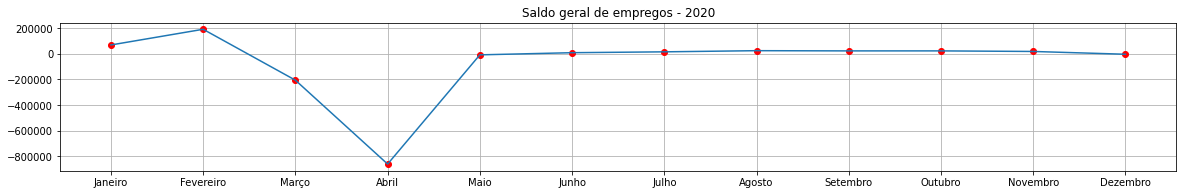

In [25]:
plotarGraficoSaldoGeral(dadosFiltrados, "Saldo geral de empregos - 2020")

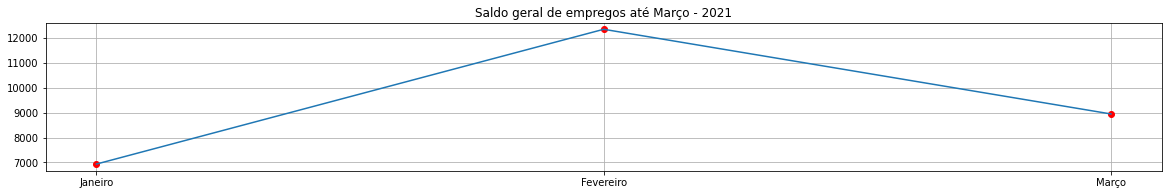

In [24]:
plotarGraficoSaldoGeral(dadosFiltrados2021, "Saldo geral de empregos até Março - 2021")